In [1]:
import numpy as np
import pandas as pd

In [38]:
# introduce missing single placeholder values (0,1,-1) at random at a dataset

def introduce_missing_values(df, missing_percentage, placeholder_value, seed=None):
    if seed is not None:
        np.random.seed(seed)
    for col in df.columns:
        num_missing_values = int(len(df) * missing_percentage)
        #print(f"Introducing {num_missing_values} missing values in column {col}")
        if num_missing_values >= len(df):
            missing_indices = df.index
        else:
            missing_indices = np.random.choice(df.index, num_missing_values, replace=num_missing_values >= len(df))
        df.loc[missing_indices, col] = placeholder_value
    return df

existing_dataset = pd.read_csv('../data/complete/26 sensors/speedx26_train.csv',header=None)

missing_percentage = .15
placeholder_value = 1
seed = 123   # Set seed value for reproducibility

modified_dataset = introduce_missing_values(existing_dataset, missing_percentage, placeholder_value, seed)

modified_dataset.to_csv(f'../data/26 sensors/speedx26_train_with_missing_{placeholder_value}.csv', index=False, header=False)

print("Modified dataset with missing values has been saved")


Modified dataset with missing values has been saved


In [8]:
# introduce missing values in a sequence with decreasing probability with each steps

import pandas as pd
import numpy as np

def introduce_sequence_missing_values(df, missing_percentage, placeholder_value, seed=None):
    if seed is not None:
        np.random.seed(seed)
    for col in df.columns:
        num_missing_values = int(len(df) * missing_percentage)
        if num_missing_values >= len(df):
            missing_indices = df.index
        else:
            missing_indices = np.random.choice(df.index, num_missing_values, replace=False)
            # Sort the missing indices
            missing_indices.sort()
            # Initialize the number of consecutive missing values
            consecutive_missing = 0
            for i in missing_indices:
                # Generate a random number
                rand_num = np.random.random()
                # Calculate the probability for the current missing value
                probability = 0.75 ** consecutive_missing
                if rand_num < probability:
                    # Set the current value to the placeholder value
                    df.at[i, col] = placeholder_value
                    # Increment the number of consecutive missing values
                    consecutive_missing += 1
                else:
                    # Reset the number of consecutive missing values
                    consecutive_missing = 0
    return df

existing_dataset = pd.read_csv('../data/26 sensors/complete/speedx26_val_test.csv', header=None)

missing_percentage = 0.15
placeholder_value = 0
seed = 123   # Set seed value for reproducibility

modified_dataset = introduce_sequence_missing_values(existing_dataset, missing_percentage, placeholder_value, seed)

modified_dataset.to_csv(f'../data/26 sensors/missing sequence with probability/speedx26_val_test_sequence_missing_{placeholder_value}.csv', index=False, header=False)

print("Modified dataset with missing values has been saved")


Modified dataset with missing values has been saved


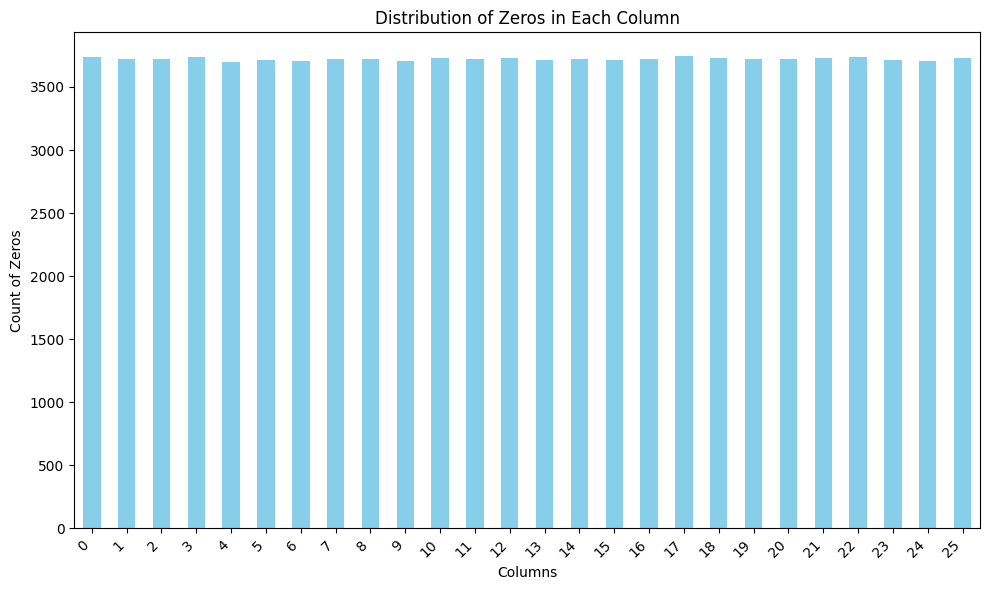

TypeError: 'numpy.float64' object cannot be interpreted as an integer

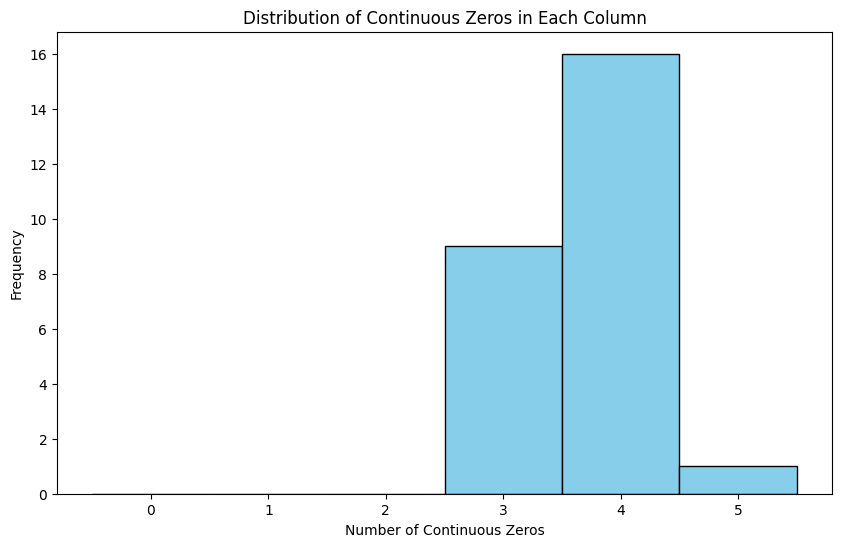

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def count_zeros(df):
    zero_counts = df.eq(0).sum()
    return zero_counts

def plot_zero_distribution(zero_counts):
    plt.figure(figsize=(10, 6))
    zero_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Zeros in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Count of Zeros')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def count_continuous_zeros(df):
    continuous_zero_counts = pd.Series(index=df.columns, dtype=int)
    for col in df.columns:
        max_continuous_zeros = 0
        current_continuous_zeros = 0
        for value in df[col]:
            if value == 0:
                current_continuous_zeros += 1
                max_continuous_zeros = max(max_continuous_zeros, current_continuous_zeros)
            else:
                current_continuous_zeros = 0
        continuous_zero_counts[col] = max_continuous_zeros
    return continuous_zero_counts

def plot_continuous_zero_distribution(continuous_zero_counts):
    plt.figure(figsize=(10, 6))
    continuous_zero_counts.plot(kind='hist', bins=np.arange(0, continuous_zero_counts.max() + 2) - 0.5, color='skyblue', edgecolor='black')
    plt.title('Distribution of Continuous Zeros in Each Column')
    plt.xlabel('Number of Continuous Zeros')
    plt.ylabel('Frequency')
    plt.xticks(range(continuous_zero_counts.max() + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Read the dataset
dataset = pd.read_csv('../data/26 sensors/missing sequence with probability/speedx26_val_test_sequence_missing_0.csv', header=None)

zero_counts = count_zeros(dataset)
plot_zero_distribution(zero_counts)
continuous_zero_counts = count_continuous_zeros(dataset)
plot_continuous_zero_distribution(continuous_zero_counts)
